# FEMA Lifelines Project

## Problem Statement
Prior to and during a disaster, it is important to understand the projected and actual effects of the event on the community, including its economic effects on critical services. FEMA has identified seven “lifelines” that require attention during a disaster: (1) Safety & Security; (2) Food, Water, Sheltering; (3) Health and medical; (4) Energy; (5) Communications; (6) Transportation; (7) Hazardous waste. 

### Our Goals

1. Estimate and categorize businesses and infrastructure in a city by FEMA Lifelines

2. Understand the distribution of FEMA Lifelines by zipcode using Houston, Texas

## Contents:
- [Lifeline 1 - Safety](#Lifeline-1---Safety)
- [Lifeline 2 - Food, Water & Shelter](#Lifeline-2---Food,-Water-&-Shelter)
- [Lifeline 3 - Health and Medical](#Lifeline-3---Health-and-Medical)
- [Lifeline 4 - Energy](#Lifeline-4---Energy)
- [Lifeline 5 - Communication](#Lifeline-5---Communication)
- [Lifeline 6 -Transportation](#Lifeline-6---Transportation)
- [Lifeline 7 - Hazardous Material](#Lifeline-7---Hazardous-Material)
- [Combine Lifelines](#Combine-Lifelines)
- [Zipcode EDA](#Zipcode-EDA)
- [Find Your City](#Find-Your-City)

### Downloads

In [1]:
# ! pip install uszipcode
# ! pip install python-google-places
# ! pip install yelp

### Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from googleplaces import GooglePlaces
from yelp.client import Client
from lifelinescrape import scrape_google, scrape_yelp, remove
from uszipcode import SearchEngine

### Set API keys

In [3]:
YELP_API_KEY = open('API_LOCATION.txt').read()[:-1]
client = Client(YELP_API_KEY)

GOOGLE_API_KEY = open('API_LOCATION.txt').read()[:-1]
google_places = GooglePlaces(GOOGLE_API_KEY)

## Lifeline 1 - Safety

#### Components
- *Law Enforcement Security*: Evacuation routes, Force protection and security for staff, Security assessments at external facilities, Damaged law enforcement or correctional facilities, Curfew.


- *Search and Rescure*: Number and location of missing survivors, Life threatening hazards to responders and survivors, Availability and resources of search and rescue teams, Status of animal assists, structural assessments, and shelter in place checks.


- *Fire Services*: Location of fire, Percent of fire contained, Fire’s rate and direction of spread, Weather conditions, Availability and resources of fire services


- *Government Services*: Status of government offices and schools, Status of continuity of government and continuity of operations


- *Responder Safety*: Safety hazards affecting operations, Requirements for Personal Protective Equipment (PPE), Security issues or concerns, Billeting for responders, Onsite training and policy


- *Imminent Hazard Mitigation**: Status of flood risk grants, Status of area dams, levees, reservoirs

#### 1. Define Search Terms
This is only a google scrape to dataframe - there is no yelp safety data. 

In [4]:
# Component List
law_enforcement_security = ['houston police department', 'houston police organization']

search_rescue = ['houston emergency management', 'Ambulance service', 'animal search and rescue']

fire_services = ['fire department']

government_services = ['government services']

# Lifeline List of Tuples
safety_tuple_list = [(law_enforcement_security, 'Law Enforce/Security'),
                     (search_rescue, 'Search and Rescue'),
                     (fire_services, 'Fire Services'),
                     (government_services, 'Government Services')]

#### 2. Run Functions to Scrape

In [5]:
safety_google_df = scrape_google(safety_tuple_list, 1, google_places)

pulled locations for houston police department
pulled locations for houston police organization
pulled locations for houston emergency management
pulled locations for Ambulance service
pulled locations for animal search and rescue
pulled locations for fire department
pulled locations for government services


#### 3. Save to csv

In [6]:
safety_google_df.to_csv('datasets/safety.csv', index=False)

## Lifeline 2 - Food, Water & Shelter

#### Components
- *Shelter*: Requirements for emergency shelter, Number and location of open shelters, Current population in shelters, Transitional Sheltering, Assistance options, Potential future sheltering requirements


- *Food and Potable Water*: Operating status of Points of Distribution (PODs), Operating status of supermarkets, neighborhood markets, and grocery stores, Operating status of restaurants, Impacts to the food supply chain, Operating status of public and private water supply systems, Operating status of water control systems (e.g., dams, levees, storm drains), Food/water health advisories


- *Water Infrastructure*: Operating status of public wastewater systems and private septic systems, Operating status of wastewater processing facilities, Operating status of public and private water infrastructure (e.g., water mains)


- *Evacuation*: Mandatory or voluntary evacuation orders, Number of people to evacuate, Evacuation routes, Evacuation time frame, Risk to responders and evacuees, Food, water, shelter availability


- *Durable Goods*: Need for PODs, Pre-designated POD locations, Operating status of PODs, Resource distribution at PODs


- *Agriculture*: Status of area agriculture, Status of food stock, Food safety

#### 1. Define Search Terms

In [7]:
# Component List
shelter = ['animal shelters', 'community centers', 'homeless shelters', 'stadium', 'arena']
food_potable_water = ['food banks', 'grocery store', 'supermarket', 
                      'water utility company', 'water treatment plant', 
                      'dams', 'Public works department', 'reservoirs']
water = ['water treatment plant', 'Sewage treatment plant', 'water mains']
evacuation = []
durable_goods = []
agriculture = ['farm']

# Lifeline List of Tuples
fws_google_list = [(shelter,'Shelter'), (food_potable_water, 'Food & Potable Water'),
                   (water, 'Water Infrastructure'), (agriculture,'Agriculture')]

#### 2. Run Functions to Scrape

In [8]:
fws_df = scrape_google(fws_google_list, 2, google_places)

pulled locations for animal shelters
pulled locations for community centers
pulled locations for homeless shelters
pulled locations for stadium
pulled locations for arena
pulled locations for food banks
pulled locations for grocery store
pulled locations for supermarket
pulled locations for water utility company
pulled locations for water treatment plant
pulled locations for dams
pulled locations for Public works department
pulled locations for reservoirs
pulled locations for water treatment plant
pulled locations for Sewage treatment plant
pulled locations for water mains
pulled locations for farm


#### 3. Save to csv

In [9]:
fws_df.to_csv('datasets/fws.csv', index=False)

## Lifeline 3 - Health and Medical

#### Components
- *Public Health*: Status of state and local health departments, Public health advisories


- *Fatality Managment*: Availability of mortuary and post-mortuary services, Availability of transportation, storage and disposal resources, Status of body recovery and processing, Descendant’s family assistance


- *Patient Movement*: Status of state and local EMS systems, Active patient evacuations, Future patient evacuations


- *Medical Care*: Status of acute medical care facilities (e.g., level 1 trauma center), Status of chronic medical care facilities (e.g., long term care centers) Status of primary care and behavioral health facilities, Status of home health agencies, Status of VA Health System resources in the affected area


- *Health Supply Chain*: Status of pharmaceutical supply chain

#### 1. Define Search Terms

In [10]:
# Component List
public_health = ['Public health department']
fatality = ['post-mortuary services', 'mortuary']
patient_move = ['Ambulance service']
medical_care = ['Emergency room', 'nursing home', 'retirement home', 
                'Assisted living facility', 'Mental health clinic', 'hospital',
               'Home health care service']
health_supply_chain = ['pharmacy', 'Pharmaceutical company']


# Lifeline List of Tuples
health_google = [(public_health,'Public Health'), (fatality, 'Fatality Management'),
                (patient_move, 'Patient Movement'), (medical_care, 'Medical Care'),
                (health_supply_chain, 'Health Supply Chain')]

#### 2. Run Functions to Scrape

In [11]:
health_df = scrape_google(health_google, 3, google_places)

pulled locations for Public health department
pulled locations for post-mortuary services
pulled locations for mortuary
pulled locations for Ambulance service
pulled locations for Emergency room
pulled locations for nursing home
pulled locations for retirement home
pulled locations for Assisted living facility
pulled locations for Mental health clinic
pulled locations for hospital
pulled locations for Home health care service
pulled locations for pharmacy
pulled locations for Pharmaceutical company


#### 3. Save to csv

In [12]:
health_df.to_csv('datasets/health.csv', index=False)

## Lifeline 4 - Energy

#### Components
 - *Fuel*: Status of commercial fuel stations, Responder fuel availability, Status of critical fuel facilities, Status of fuel supply line


- *Temporary Power*: Status of critical facilities, Availability of temporary power resources


- *Power Grid*: Status of electrical power generation and distribution facilities, Number of people and locations without power, Estimated time to restoration of power, Number of electrically dependent persons (e.g., medical equipment)affected, Status of nuclear power plants, Status of nuclear power plants within 10 miles, Status of natural gas and fuel pipelines in the affected area

#### 1. Define Search Terms

In [13]:
# Component List
fuel = ['servicestations','naturalgassuppliers']
temp_power = ['utilities', 'electricitysuppliers']
fuel_g = ['Fuel supplier', 'colonial pipeline', 'gas company'] #google versions of fuel component
temp_power_g = ['Electrical equipment supplier'] #google versions of temp_power component
power = ['Electrical substation', 'power plant', 'nuclear power plant']

# Lifeline List of Tuples
energy_yelp = [(fuel, 'Fuel'), (temp_power, 'Temporary Power')]
energy_google = [(fuel_g, 'Fuel'), (temp_power_g, 'Temporary Power'), (power, 'Power')]

#### 2. Run Functions to Scrape

In [14]:
yelp_df = scrape_yelp(energy_yelp, 4, YELP_API_KEY)
yelp_df.head()

got 50
got 50
got 50
got 24
got 0
reached the end
total collected: 174


,Business,Category,Source,Latitude,Longitude,Lifeline,Component
0,Costco,wholesale_stores,Yelp,29.734222,-95.439582,4,None
1,Medical Center Shell,servicestations,Yelp,29.706535,-95.412963,4,Fuel
2,Mobil,servicestations,Yelp,29.762319,-95.467041,4,Fuel
3,Kroger,servicestations,Yelp,29.773535,-95.390373,4,Fuel
4,Roberts Mobil Car Care Center,servicestations,Yelp,29.742008,-95.441978,4,Fuel


In [15]:
google_df = scrape_google(energy_google, 4, google_places)
google_df.shape

pulled locations for Fuel supplier
pulled locations for colonial pipeline
pulled locations for gas company
pulled locations for Electrical equipment supplier
pulled locations for Electrical substation
pulled locations for power plant
pulled locations for nuclear power plant


(109, 7)

#### 3. Combine Yelp and Google DataFrames

In [16]:
energy_df = pd.concat([yelp_df, google_df], ignore_index=True)

#### 4. Clean Data

In [17]:
# Dropping all categories that don't actually meet lifelines
# Using remove function to do it

energy_df = remove(['grocery','wholesale_stores','autorepair', 'burgers',
                  'hotdogs', 'convenience', 'shopping', 'localservices', 
                 'businessconsulting', 'electricians'], energy_df)

#### 5. Save to csv

In [18]:
energy_df.to_csv('datasets/energy.csv', index=False)

## Lifeline 5 - Communication

#### Components
- *Communication Infrastructure*: Status of telecommunications service, Reliability of internet service, Reliability of cellular service, Requirements for radio/satellite communication capability


- *Alerts Warnings Messages*: Status of the emergency alert system (e.g., TV, radio, cable, cell), Status of public safety radio communications, Options for dissemination of information to the whole community, External affairs and media communication


- *Dispatch 911*: Status of phone infrastructure and emergency line, Number of callers and availability of staff and facilities, Status of responder communications Availability of communications equipment


- *Responder Commmunications*: Status of EOC(s), dispatcher, and field responder communications, Availability and status of first responder communications equipment


- *Financial Services*: Access to cash, Access to electronic payment, National economic impacts

#### 1. Define Search Terms

In [19]:
# Component Lists
infrastructure = ['houston cell towers']

alerts_warnings_messages = ['radiostations', 'televisionstations']

financial_services = ['banks']

# Lifeline List of Tuples
comm_yelp = [(alerts_warnings_messages, 'Alerts & Warnings'),(financial_services, 'Financial Services')]
comm_tuples = [(infrastructure, 'Infrastructure')]

#### 2. Run Functions to Scrape

In [20]:
# Yelp
communication_yelp_df = scrape_yelp(comm_yelp, 5, YELP_API_KEY)

got 50
got 50
got 50
got 50
got 30
got 0
reached the end
total collected: 230


In [21]:
# Google
communication_google_df = scrape_google(comm_tuples, 5, google_places)

pulled locations for houston cell towers


#### 3. Combine Yelp and Google DataFrames

In [22]:
comm_df = pd.concat([communication_google_df, communication_yelp_df])

#### 4. Clean Data

In [23]:
# Dropping all categories that don't actually meet lifelines
# Using remove function to do it

comm_df = remove(['djs', 'paydayloans', 'investing', 'mortgagebrokers'], comm_df)

#### 5. Save to csv

In [24]:
comm_df.to_csv('datasets/communication.csv', index=False)

## Lifeline 6 -Transportation

#### Components
- *Highway*: Status of major roads andhighways, Status of critical and noncritical bridges, Status of maintenance and emergency repairs


- *Mass Transit*: Status of public transit systems including underground rail, buses, and ferry services


- *Railway*: Status of area railways and stations


- *Aviation*: Status of area airports, Status of incoming and outgoing flights


- *Maritime*: Status of area waterways, Status of area ports


- *Pipline*: Status of natural gas and fuel pipelines

#### 1. Define Search Terms

In [25]:
# Component Lists
highway = ['roadsideassist', 'towing']

mass_transit = ['buses', 'metrostation','publictransport','metrostations','busstations']

railway = ['trainstations']

aviation = ['houston airport']

maritime = ['houston port']

pipeline = ['houston pipeline']

# Lifeline List of Tuples
transport_yelp = [(highway, 'Highway'), (mass_transit, 'Mass Transit'), 
                  (railway, 'Railway')]
transport_google = [(aviation, 'Aviation'),(maritime, 'Maritime'),
                    (pipeline, 'Pipeline')]

#### 2. Run Functions to Scrape

In [26]:
# Run Yelp function and save to dataframe
transport_yelp_df = scrape_yelp(transport_yelp, 6, YELP_API_KEY)

got 50
got 50
got 50
got 40
got 0
reached the end
total collected: 190


In [27]:
# Run Google function and save to dataframe
transport_google_df = scrape_google(transport_google, 6, google_places)

pulled locations for houston airport
pulled locations for houston port
pulled locations for houston pipeline


#### 3. Combine Yelp and Google dataframes

In [28]:
# Combine DataFrames
transport_df = pd.concat([transport_google_df, transport_yelp_df])

#### 4. Cleaning up data

In [29]:
# Dropping all categories that don't actually meet lifelines
# Using remove function to do it

transport_df = remove(['parks','bodyshops', 'autorepair', 'airport_shuttles', 
                             'autopartssupplies', 'transmissionrepair', 'limos',
                              'selfstorage', 'tours', 'rvrepair', 'homeinsurance',
                      'tires', 'wheelrimrepair', 'taxis', 'publicservicesgovt'], transport_df)

#### 5. Save to csv

In [30]:
transport_df.to_csv('datasets/transportation.csv', index=False)

## Lifeline 7 - Hazardous Material

#### Components
- *Facilities*: Status of hazardous material facilities, Amount, type, and containment procedures of hazardous materials, Reported or suspected hazardous material/toxic release incidents, Status of hazardous material supply chain


- *Hazardous Incident*: Debris issues affecting the transportation system, Status of debris clearance operations, Reported or suspected hazardous material/toxic release incidents, Actual or potential radiological or nuclear incidents, Monitoring actions planned or underway for HAZMAT incidents


#### 1. Define Search Terms

In [31]:
# Component Lists
facilities = ['biohazardcleanup', 'hazardouswastedisposal']
facilities_g = ['hazardous waste','nuclear power plant']

# Lifeline List of Tuples
waste_yelp = [(facilities, 'Facilities')]
waste_google = [(facilities_g, 'Facilities')]

#### 2. Run Functions to Scrape

In [32]:
yelp_df = scrape_yelp(waste_yelp, 7, YELP_API_KEY)
yelp_df.head()

got 3
got 0
reached the end
total collected: 3


,Business,Category,Source,Latitude,Longitude,Lifeline,Component
0,Bio-Tex,homecleaning,Yelp,30.013385,-95.457453,7,None
1,Liquid Waste Solutions,hazardouswastedisposal,Yelp,29.773835,-95.558245,7,Facilities
2,Sharps Compliance Medical Waste Disposal,hazardouswastedisposal,Yelp,29.671359,-95.413821,7,Facilities


In the case of all three items pulled down from yelp, these businesses don't apply to the Hazardous Material lifeline.

Could look into their involvment in the hurricane more, but they are mostly concered with 
- Bio-Tex - crimescene clean up
- Liquid Waste - grease traps, etc
- Sharps - medical waste disposal

So I'm not going to move forward with this data.

In [33]:
waste_df = scrape_google(waste_google, 7, google_places)

pulled locations for hazardous waste
pulled locations for nuclear power plant


#### 3. Save to csv

In [34]:
waste_df.to_csv('datasets/waste.csv', index=False)

## Combine Lifelines

In [35]:
# import csvs
one = pd.read_csv('datasets/safety.csv')
two = pd.read_csv('datasets/fws.csv')
three = pd.read_csv('datasets/health.csv')
four = pd.read_csv('datasets/energy.csv')
five = pd.read_csv('datasets/communication.csv')
six = pd.read_csv('datasets/transportation.csv')
seven = pd.read_csv('datasets/waste.csv')

In [36]:
df = pd.concat([one, two, three, four, five, six, seven], ignore_index=True, sort=True)
# df = pd.read_csv()
print(df.shape)
df.head()

(1365, 7)


,Business,Category,Component,Latitude,Lifeline,Longitude,Source
0,Houston Police Department Headquarters,houston police department,Law Enforce/Security,29.755584,1,-95.367472,Google
1,Houston Police Department,houston police department,Law Enforce/Security,29.857023,1,-95.539746,Google
2,Houston Police Department,houston police department,Law Enforce/Security,29.727379,1,-95.604769,Google
3,Houston Police Department,houston police department,Law Enforce/Security,29.767038,1,-95.368363,Google
4,Houston Police Department - Central Patrol Sta...,houston police department,Law Enforce/Security,29.764894,1,-95.370553,Google


#### Bonus: Add column for Lifeline names

In [37]:
def lifeline_builder(lifeline):
    def unpack(cell):
        for tup in lifeline:
            for n in tup:
                if cell == tup[0]:
                    return tup[1]
    return df['Lifeline'].map(unpack)

lifeline = [(1, 'Saftey & Security'), (2, 'Food, Water & Shelter'),
            (3, 'Health & Medical'), (4, 'Energy'), (6, 'Transportation'),
           (5, 'Communication'), (7, 'Hazardous Material')]


df['Lifeline Name'] = lifeline_builder(lifeline)
df.head()

,Business,Category,Component,Latitude,Lifeline,Longitude,Source,Lifeline Name
0,Houston Police Department Headquarters,houston police department,Law Enforce/Security,29.755584,1,-95.367472,Google,Saftey & Security
1,Houston Police Department,houston police department,Law Enforce/Security,29.857023,1,-95.539746,Google,Saftey & Security
2,Houston Police Department,houston police department,Law Enforce/Security,29.727379,1,-95.604769,Google,Saftey & Security
3,Houston Police Department,houston police department,Law Enforce/Security,29.767038,1,-95.368363,Google,Saftey & Security
4,Houston Police Department - Central Patrol Sta...,houston police department,Law Enforce/Security,29.764894,1,-95.370553,Google,Saftey & Security


In [38]:
# make sure we don't have null values
df.isnull().sum()

Business         0
Category         0
Component        0
Latitude         0
Lifeline         0
Longitude        0
Source           0
Lifeline Name    0
dtype: int64

In [39]:
# make sure all 7 lifelines were mapped correctly
df['Lifeline Name'].value_counts()

Food, Water & Shelter    329
Energy                   270
Health & Medical         260
Communication            229
Transportation           162
Saftey & Security         88
Hazardous Material        27
Name: Lifeline Name, dtype: int64

#### Bonus: Add column for zipcode

In [40]:
# # This code takes about 25 minutes to run, *uncommenters beware*

# lat_list =  list(df['Latitude'])
# long_list = list(df['Longitude'])
# search = SearchEngine(simple_zipcode=False)

# num = 1
# zips_list = []
# for lat_coord, long_coord in zip(lat_list, long_list):

#     res_zip = search.by_coordinates(lat=lat_coord, lng=long_coord, radius=50, returns = 1)
    
#     zipcode = res_zip[0].zipcode 
#     ###print res_zip just to see. calling[0] allows me to not use a for loop and get right to what is needed
    
#     zips_list.append(zipcode)
    
#     print(f'zip {num}: {zipcode}')
    
#     num +=1
    
# print('Party\'s over. Ya did it.')

# df['Zipcode'] = zips_list

#### Save to csv

In [41]:
# df.to_csv('datasets/all_lifelines.csv', index = False)

## Zipcode EDA

#### Create Dataframe where each row is a zipcode and each column in a Lifeline

In [43]:
df = pd.read_csv('datasets/all_lifelines.csv')
lifelines_by_zip = {}
zc_list = df['Zipcode'].unique()

for z in zc_list:
    unique_df = df[df['Zipcode'] == z]
    
    value_cs = unique_df['Lifeline Name'].value_counts()
    
    lifelines_by_zip.update({z: value_cs})
    
lifelines_zip_df = pd.DataFrame(lifelines_by_zip).T

#NaN means there were no locations within that zipcode => so turning into zero
lifelines_zip_df = lifelines_zip_df.fillna(0) 

In [44]:
# add up all lifeline counts and put in new column, 'Total'
lifelines_zip_df['Total'] = lifelines_zip_df['Communication']+lifelines_zip_df['Energy']+lifelines_zip_df['Food, Water & Shelter']+\
                            lifelines_zip_df['Hazardous Material']+lifelines_zip_df['Health & Medical']+\
                            lifelines_zip_df['Saftey & Security']+ lifelines_zip_df['Transportation']
lifelines_zip_df.head()

,Communication,Energy,"Food, Water & Shelter",Hazardous Material,Health & Medical,Saftey & Security,Transportation,Total
77002,12.0,12.0,4.0,1.0,6.0,3.0,2.0,40.0
77040,0.0,3.0,2.0,1.0,2.0,2.0,1.0,11.0
77077,0.0,1.0,10.0,0.0,5.0,1.0,1.0,18.0
77201,6.0,6.0,1.0,0.0,2.0,8.0,11.0,34.0
77071,0.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0


#### Groupby Above or Below Average Lifeline count per Zipcode

In [45]:
# look at the mean
lifelines_zip_df['Total'].mean()

9.178807947019868

In [46]:
# Define 'Above'
above_df = lifelines_zip_df[lifelines_zip_df['Total'] > lifelines_zip_df['Total'].mean()]

In [47]:
# Define 'Below'
below_df = lifelines_zip_df[lifelines_zip_df['Total'] < lifelines_zip_df['Total'].mean()]

In [48]:
# Look at 'Above' spread
print('Describes the distribution of above average zipcodes')
above_df.describe()

Describes the distribution of above average zipcodes


,Communication,Energy,"Food, Water & Shelter",Hazardous Material,Health & Medical,Saftey & Security,Transportation,Total
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,4.428571,4.183673,3.571429,0.244898,3.530612,1.183673,2.040816,19.183673
std,5.151861,3.413658,2.753785,0.480044,2.509167,1.394535,2.226350,9.013123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,12.000000
50%,3.000000,4.000000,4.000000,0.000000,4.000000,1.000000,1.000000,16.000000
75%,7.000000,6.000000,5.000000,0.000000,5.000000,2.000000,3.000000,24.000000
max,21.000000,12.000000,10.000000,2.000000,13.000000,8.000000,11.000000,43.000000


In [49]:
# Look at 'Below' spread
print('Describes the distribution of below average zipcodes')
below_df.describe()

Describes the distribution of below average zipcodes


,Communication,Energy,"Food, Water & Shelter",Hazardous Material,Health & Medical,Saftey & Security,Transportation,Total
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.117647,0.705882,1.598039,0.215686,0.852941,0.294118,0.588235,4.372549
std,0.429001,1.130918,1.477621,0.538194,1.056775,0.573132,0.787941,2.609661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000
75%,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,7.000000
max,3.000000,6.000000,6.000000,3.000000,5.000000,2.000000,4.000000,9.000000


#### Are the means between Above average and Below average signifcant?

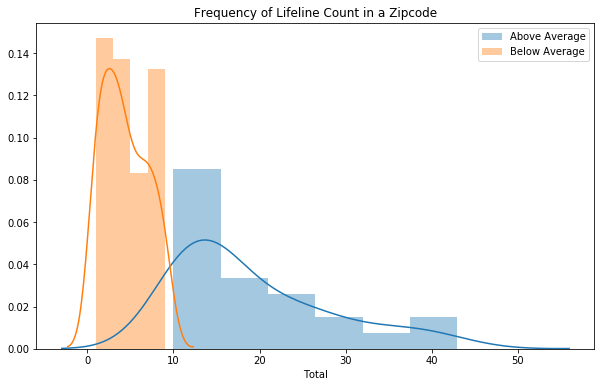

In [50]:
# plot the different distributions of lifeline counts
fig , ax1 = plt.subplots(figsize=(10,6))

sns.distplot(above_df['Total'], ax = ax1, label='Above Average')
sns.distplot(below_df['Total'], ax = ax1, label='Below Average')
ax1.legend()
plt.title('Frequency of Lifeline Count in a Zipcode');

In [51]:
# run a t-test
stats.ttest_ind(above_df['Total'], below_df['Total'])

Ttest_indResult(statistic=15.357391281248585, pvalue=1.6495037622291742e-32)

#### Conclusion
With a p-value so low, I reject my null hypothesis and conclude that there is a significant different between the group of zipcodes with above average lifeline counts and the group of zipcodes with below average lifeline counts. 

This means for Houston, TX there is a significant lack of diversity and spread of resources throughout the city. This is supported by additional research about the city showing differences in income, zoning, and historical resource allocations aligning with the locations of our lifelines. 

#### Describe these zipcode groupings on the original DataFrame
Below is list comprehension that creates a new column where the zipcodes are labeled as being 'Above' the average count of lifelines per zipcode or 'Below' the average count of lifelines per zipcode.

In [52]:
df['Mean'] = ['Above' if cell in list(above_df.index)\
              else 'Below' for cell in df['Zipcode']]
df['Mean'].value_counts()

Above    940
Below    446
Name: Mean, dtype: int64

#### Save new column to original csv

In [53]:
df.to_csv('datasets/all_lifelines.csv', index = False)

## Find Your City

- `find_lifelines` is a function that pulls data from Google for each Lifeline using "generic" search terms for whatever city you put into the function.


- The function will return a csv name after the city you input. 
    - For example:
    - `find_lifelines('Austin, Texas', google_places)` 
    - will return a csv called `Austin, Texas.csv`
        
        
- The completed csv will look like this:

| Business | Category | Latitude | Longitude | Lifeline | Component |
|----------------------------------|-------------------|-----------|------------|-------------------|--------------------------|
| Business 1 | search term | float | float | lifeline name | component name |
|**Austin, Texas Example:**         |  |
| City of Austin Police Department | police department | 30.267554 | -97.734664 | Safety & Security | Law Enforcement/Security |


- **Note**: because only "generic" search terms are used, this would not be considered a robust dataset of locations for each lifeline. To create a more robust dataset would require research into that specific city's resources, industries and geography to find more specific and appropriate search terms to define in the function.
    - For example for the component Maritime of the Transportation Lifeline
        - *generic/already given* `maritime = ['port']`
        - *specific* `maritime_sp = ['Houston port']`
        - `find_lifelines('Houston, Texas', google_places, maritime=maritime_sp)`

In [2]:
# imports
from lifelinescrape import find_lifelines
from googleplaces import GooglePlaces

# define API KEY
GOOGLE_API_KEY = open('API_LOCATION.txt').read()[:-1]
google_places = GooglePlaces(GOOGLE_API_KEY)

# run function
find_lifelines('YOUR_CITY_HERE', google_places)